In [4]:
import matplotlib.pyplot as plt
import numpy as np

import os
import json
import pandas as pd

## Protein Aggregation result 

In [21]:
# Define the list of specific folder paths with full paths
folders = [
    "./weights/seq/(onehot)_(combinedloss)_(local_3block256dim)_(global_1layer128_4head)/",
    "./weights/seq/(onehot_meiler)_(combinedloss)_(local_3block256dim)_(global_1layer128_4head)/",
    
    "./weights/seq/(esm35M)_(combinedloss)_(local_3block256dim)_(global_1layer128_4head)/",
    "./weights/seq/(esm35M)_(combinedloss)_(none)/",
    
    "./weights/seq/(protbert)_(combinedloss)_(local_3block256dim)_(global_1layer128_4head)/",
    "./weights/seq/(protbert)_(combinedloss)_(none)/",

    "./weights/seq/(onehot)_(regloss)_(local_3block256dim)_(global_1layer128_4head)/",
    "./weights/seq/(onehot_meiler)_(regloss)_(local_3block256dim)_(global_1layer128_4head)/",
    
    "./weights/seq/(esm35M)_(regloss)_(local_3block256dim)_(global_1layer128_4head)/",
    "./weights/seq/(esm35M)_(regloss)_(none)/",
    
    "./weights/seq/(protbert)_(regloss)_(local_3block256dim)_(global_1layer128_4head)/",
    "./weights/seq/(protbert)_(reglosss)_(none)/",

    "./weights/graph/(onehot)_(3EGNN)",
    "./weights/graph/(onehot)_(3GAT)",
    "./weights/graph/(onehot)_(3GCN)",
    
    "./weights/graph/(onehot)_(1EGNN)",

    "./weights/graph/(esm8M)_(1EGNN)",
    "./weights/graph/(esm8M)_(1GAT)",
    "./weights/graph/(esm8M)_(1GCN)",


]

# Initialize an empty list to store the results
results_list = []

# Loop through each folder in the list
for folder in folders:
    
    # Ensure the folder exists
    if os.path.isdir(folder):
        result_file = os.path.join(folder, "result.json")
        
        # Check if the result.json file exists
        if os.path.isfile(result_file):
            
            # Open and load the JSON data
            with open(result_file, 'r') as f:
                data = json.load(f)
            
            # Extract regression and classification metrics
            regression_metrics = data.get("Regression Metrics", {})
            classification_metrics = data.get("Classification Metrics", {})
            
            # Combine both metrics into one dictionary
            combined_metrics = {**regression_metrics, **classification_metrics}
            
            # Add the folder name (model configuration) to the metrics
            combined_metrics["Model"] = folder
            
            # Append the combined metrics to the list
            results_list.append(combined_metrics)

# Convert the results list into a DataFrame
df = pd.DataFrame(results_list)

metrics_order = ['R2', 'PCC', 'MSE', 'MAE', 'AUC-ROC', 'AUC-PR', 'MCC']

# Create a new column order with the desired metrics first, followed by any other columns
new_column_order = metrics_order + [col for col in df.columns if col not in metrics_order]

# Rearrange the DataFrame columns
df = df[new_column_order]

# Save the DataFrame to a CSV file (optional)
# df.to_csv("combined_results.csv", index=False)

# # Display the DataFrame
# print(df)


In [22]:

# Save the DataFrame to a CSV file (optional)
df.to_csv("combined_results.csv", index=False)

# Display the DataFrame
df


,R2,PCC,MSE,MAE,AUC-ROC,AUC-PR,MCC,RMSE,Accuracy,Precision,Recall,F1-Score,Model
0,0.7525,0.8684,0.5295,0.5368,0.9088,0.7217,0.5889,0.7276,0.8711,0.6674,0.6705,0.6690,./weights/seq/(onehot)_(combinedloss)_(local_3...
1,0.8062,0.8985,0.4090,0.4639,0.9288,0.7810,0.6266,0.6395,0.8708,0.6315,0.7889,0.7015,./weights/seq/(onehot_meiler)_(combinedloss)_(...
2,0.8088,0.9031,0.4089,0.4729,0.9282,0.8053,0.6732,0.6395,0.8941,0.7096,0.7700,0.7386,./weights/seq/(esm35M)_(combinedloss)_(local_3...
3,0.7903,0.8891,0.4486,0.4975,0.9180,0.7850,0.6429,0.6698,0.8851,0.6914,0.7385,0.7141,./weights/seq/(esm35M)_(combinedloss)_(none)/
4,0.7837,0.8857,0.4627,0.5065,0.9158,0.7848,0.6461,0.6802,0.8858,0.6914,0.7443,0.7168,./weights/seq/(protbert)_(combinedloss)_(local...
5,0.7770,0.8815,0.4770,0.5172,0.9112,0.7737,0.6200,0.6906,0.8762,0.6651,0.7309,0.6964,./weights/seq/(protbert)_(combinedloss)_(none)/
6,0.7531,0.8683,0.5281,0.5454,0.8959,0.6749,0.5280,0.7267,0.8354,0.5606,0.7082,0.6258,./weights/seq/(onehot)_(regloss)_(local_3block...
7,0.8073,0.8996,0.4096,0.4609,0.9209,0.7598,0.5862,0.6400,0.8459,0.5728,0.8039,0.6690,./weights/seq/(onehot_meiler)_(regloss)_(local...
8,0.8257,0.9097,0.3728,0.4335,0.9284,0.8040,0.6553,0.6106,0.8851,0.6777,0.7792,0.7249,./weights/seq/(esm35M)_(regloss)_(local_3block...
9,0.7958,0.8925,0.4367,0.4811,0.9116,0.7786,0.6195,0.6608,0.8751,0.6601,0.7367,0.6963,./weights/seq/(protbert)_(regloss)_(local_3blo...


In [23]:
df_sorted = df.sort_values(by=["MCC", "R2"], ascending=[False, False])

# Display the sorted DataFrame
df_sorted

# Optionally save the sorted DataFrame to a CSV file
df_sorted.to_csv("sorted_combined_results.csv", index=False)

# Antibody Aggregation result

In [30]:

# Define the list of specific folder paths with full paths
folders = [
    "./weights_antibody/seq/(onehot)_(combinedloss)_(local_3block256dim)_(global_1layer128_4head)/",
    "./weights_antibody/seq/(onehot_meiler)_(combinedloss)_(local_3block256dim)_(global_1layer128_4head)/",
    
    "./weights_antibody/seq/(esm35M)_(combinedloss)_(local_3block256dim)_(global_1layer128_4head)/",
    "./weights_antibody/seq/(protbert)_(combinedloss)_(local_3block256dim)_(global_1layer128_4head)/",
    "./weights_antibody/seq/(antiberty)_(combinedloss)_(local_3block256dim)_(global_1layer128_4head)/",
    
    "./weights_antibody/seq/(antiberty)_(combinedloss)_(none)/",
    "./weights_antibody/seq/(esm35M)_(combinedloss)_(none)/",
    "./weights_antibody/seq/(protbert)_(combinedloss)_(none)/",

]

# Initialize an empty list to store the results
results_list = []

# Loop through each folder in the list
for folder in folders:
    
    # Ensure the folder exists
    if os.path.isdir(folder):
        result_file = os.path.join(folder, "result.json")
        
        # Check if the result.json file exists
        if os.path.isfile(result_file):
            
            # Open and load the JSON data
            with open(result_file, 'r') as f:
                data = json.load(f)
            
            # Extract regression and classification metrics
            regression_metrics = data.get("Regression Metrics", {})
            classification_metrics = data.get("Classification Metrics", {})
            
            # Combine both metrics into one dictionary
            combined_metrics = {**regression_metrics, **classification_metrics}
            
            # Add the folder name (model configuration) to the metrics
            combined_metrics["Model"] = folder
            
            # Append the combined metrics to the list
            results_list.append(combined_metrics)

# Convert the results list into a DataFrame
df = pd.DataFrame(results_list)

metrics_order = ['R2', 'PCC', 'MSE', 'MAE', 'AUC-ROC', 'AUC-PR', 'MCC']

# Create a new column order with the desired metrics first, followed by any other columns
new_column_order = metrics_order + [col for col in df.columns if col not in metrics_order]

# Rearrange the DataFrame columns
df = df[new_column_order]

In [25]:

# Save the DataFrame to a CSV file (optional)
df.to_csv("anti_combined_results.csv", index=False)

df

,R2,PCC,MSE,MAE,AUC-ROC,AUC-PR,MCC,RMSE,Accuracy,Precision,Recall,F1-Score,Model
0,0.8211,0.9158,0.1263,0.2367,0.9608,0.8233,0.7164,0.3554,0.9502,0.6085,0.9008,0.7264,./weights_antibody/seq/(onehot)_(combinedloss)...
1,0.8350,0.9179,0.1165,0.2384,0.9579,0.8100,0.7131,0.3414,0.9511,0.6167,0.8811,0.7256,./weights_antibody/seq/(onehot_meiler)_(combin...
2,0.8270,0.9170,0.1222,0.2363,0.9588,0.8127,0.7141,0.3495,0.9503,0.6100,0.8933,0.7250,./weights_antibody/seq/(esm35M)_(combinedloss)...
3,0.8273,0.9154,0.1219,0.2421,0.9586,0.8049,0.7117,0.3492,0.9498,0.6072,0.8922,0.7226,./weights_antibody/seq/(protbert)_(combinedlos...
4,0.8243,0.9116,0.1241,0.2411,0.9466,0.7921,0.7165,0.3522,0.9540,0.6392,0.8563,0.7320,./weights_antibody/seq/(antiberty)_(combinedlo...
5,0.7620,0.8751,0.1698,0.2955,0.9200,0.6886,0.5717,0.4121,0.9209,0.4721,0.7875,0.5903,./weights_antibody/seq/(antiberty)_(combinedlo...
6,0.7620,0.8751,0.1698,0.2955,0.9200,0.6886,0.5717,0.4121,0.9209,0.4721,0.7875,0.5903,./weights_antibody/seq/(esm35M)_(combinedloss)...
7,0.7620,0.8751,0.1698,0.2955,0.9200,0.6886,0.5717,0.4121,0.9209,0.4721,0.7875,0.5903,./weights_antibody/seq/(protbert)_(combinedlos...


# Plot the effect of combined loss

In [52]:
from io import BytesIO

def plot_comparison(labels, datasets, model_names, colors, title, ylabel='Metric Value'):
    """
    Function to plot a bar chart comparing different models on various metrics.
    
    Args:
        labels (list of str): The metric labels (e.g., R2, PCC, MSE).
        datasets (list of list of float): List of model performance lists. Each list corresponds to a model's performance across metrics.
        model_names (list of str): List of model names for legend.
        colors (list of str): List of colors for each model's bars.
        title (str): The title of the chart.
        ylabel (str): Label for the y-axis.
    """
    x = np.arange(len(labels))  # the label locations
    width = 0.8 / len(datasets)  # dynamically adjust bar width based on number of datasets

    fig, ax = plt.subplots(figsize=(12, 7))

    # Create bars for each dataset
    for i, data in enumerate(datasets):
        offset = (i - len(datasets) / 2) * width  # calculate the position offset for each dataset
        bars = ax.bar(x + offset, data, width, label=model_names[i], color=colors[i])

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', rotation=80)  # Rotate labels vertically

    # Adding labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title, pad=30)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    # Move legend to bottom and split it into two rows if necessary
    n_models = len(model_names)
    ncol = 2 if n_models > 5 else n_models  # Split into 2 rows if there are more than 8 models
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=ncol,
              handlelength=1, handleheight=1.2, borderpad=0.5, labelspacing=0.5)

    # Adding horizontal grid lines for better readability
    ax.yaxis.grid(True)

    # Removing the top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Adding a border around the plot
    fig.patch.set_facecolor('white')  # Set the background color of the figure
    fig.patch.set_edgecolor('black')  # Set the edge color of the figure
    fig.patch.set_linewidth(0.3)  # Set the width of the border


    # plt.tight_layout()
    # plt.show()
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
    plt.show()



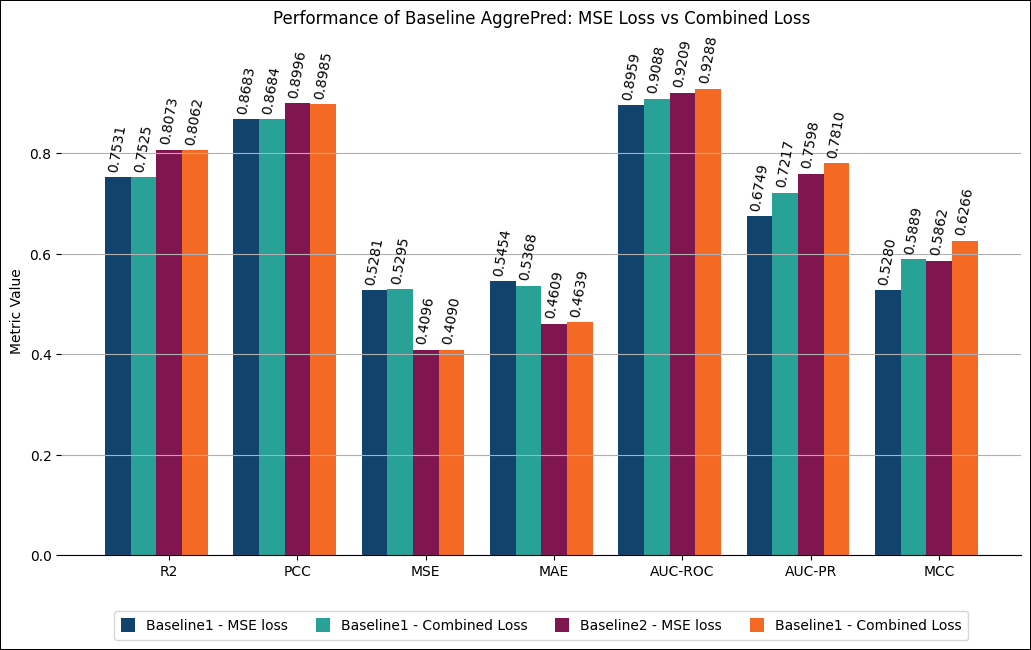

In [53]:


# Data for the bar chart
labels = ['R2', 'PCC', 'MSE', 'MAE', 'AUC-ROC', 'AUC-PR', 'MCC']
baseline1_mse = [0.7531, 0.8683, 0.5281, 0.5454, 0.8959, 0.6749, 0.528]
baseline2_mse = [0.8073, 0.8996, 0.4096, 0.4609, 0.9209, 0.7598, 0.5862]
baseline1_combined = [0.7525, 0.8684, 0.5295, 0.5368, 0.9088, 0.7217, 0.5889]
baseline2_combined = [0.8062, 0.8985, 0.409, 0.4639, 0.9288, 0.781, 0.6266]

datasets = [baseline1_mse, baseline1_combined, baseline2_mse, baseline2_combined]
model_names = ["Baseline1 - MSE loss","Baseline1 - Combined Loss","Baseline2 - MSE loss","Baseline1 - Combined Loss",]
colors = ['#12436D', '#28A197', '#801650', '#F46A25']

plot_comparison(labels, datasets, model_names, colors, title='Performance of Baseline AggrePred: MSE Loss vs Combined Loss')


# different embedding for seq-based protein


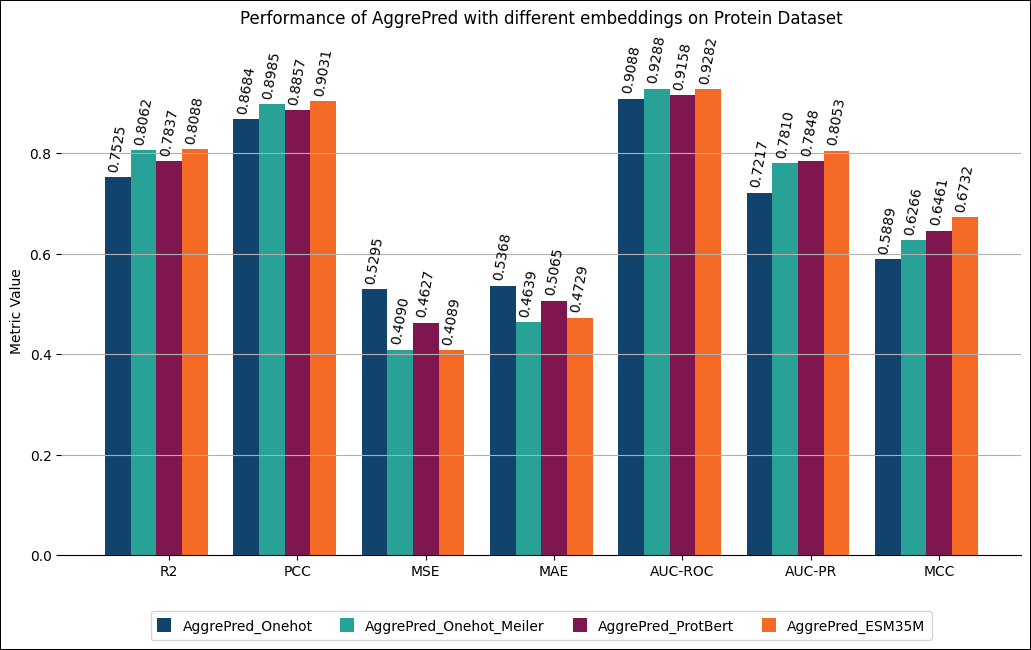

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
labels = ['R2', 'PCC', 'MSE', 'MAE', 'AUC-ROC', 'AUC-PR', 'MCC']
onehot = [0.7525, 0.8684, 0.5295, 0.5368, 0.9088, 0.7217, 0.5889]
onehot_meiler = [0.8062, 0.8985, 0.409, 0.4639, 0.9288, 0.781, 0.6266]
esm35M = [0.8088, 0.9031, 0.4089, 0.4729, 0.9282, 0.8053, 0.6732]
protbert = [0.7837, 0.8857, 0.4627, 0.5065, 0.9158, 0.7848, 0.6461]

datasets = [onehot, onehot_meiler, protbert, esm35M]
model_names = ["AggrePred_Onehot","AggrePred_Onehot_Meiler","AggrePred_ProtBert","AggrePred_ESM35M",]
colors = ['#12436D', '#28A197', '#801650', '#F46A25']

plot_comparison(labels, datasets, model_names, colors, title='Performance of AggrePred with different embeddings on Protein Dataset')



# different embed for antibody

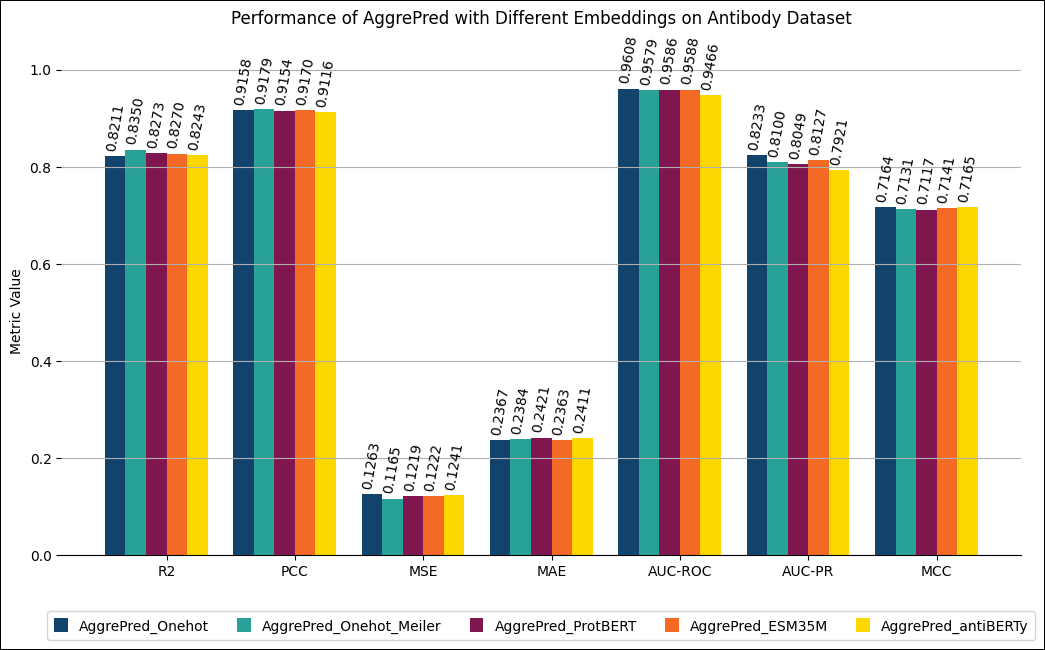

In [56]:
onehot = [0.8211, 0.9158, 0.1263, 0.2367, 0.9608, 0.8233, 0.7164]
onehot_meiler = [0.835, 0.9179, 0.1165, 0.2384, 0.9579, 0.81, 0.7131]
protbert = [0.8273, 0.9154, 0.1219, 0.2421, 0.9586, 0.8049, 0.7117]
esm35M = [0.827, 0.917, 0.1222, 0.2363, 0.9588, 0.8127, 0.7141]
antiberty = [0.8243, 0.9116, 0.1241, 0.2411, 0.9466, 0.7921, 0.7165]

datasets = [onehot, onehot_meiler, protbert, esm35M, antiberty]
model_names = ['AggrePred_Onehot', 'AggrePred_Onehot_Meiler', 'AggrePred_ProtBERT', 'AggrePred_ESM35M', 'AggrePred_antiBERTy']
colors = ['#12436D', '#28A197', '#801650', '#F46A25', '#FFD700']

plot_comparison(labels, datasets, model_names, colors, title='Performance of AggrePred with Different Embeddings on Antibody Dataset')


# AggrePred vs finetuned

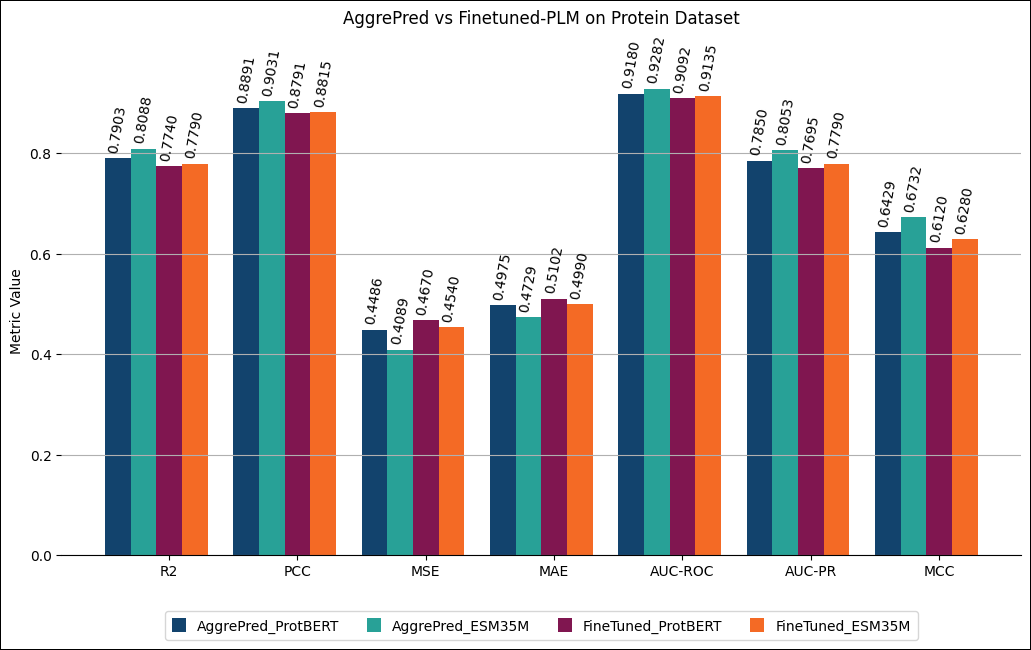

In [57]:
# Protein models (no change)
protein_protbert = [0.7903, 0.8891, 0.4486, 0.4975, 0.918, 0.785, 0.6429]
protein_esm35M = [0.8088, 0.9031, 0.4089, 0.4729, 0.9282, 0.8053, 0.6732]

protein_protbert_finetuned = [0.7740, 0.8791, 0.4670, 0.5102, 0.9092, 0.7695, 0.6120]
protein_esm35M_finetuned = [0.7790, 0.8815, 0.4540, 0.4990, 0.9135, 0.7790, 0.6280]


datasets = [protein_protbert, protein_esm35M, protein_protbert_finetuned, protein_esm35M_finetuned]

model_names = ['AggrePred_ProtBERT', 'AggrePred_ESM35M', 'FineTuned_ProtBERT', 'FineTuned_ESM35M']

colors = ['#12436D', '#28A197', '#801650', '#F46A25', '#FFD700']
plot_comparison(labels, datasets, model_names, colors, title='AggrePred vs Finetuned-PLM on Protein Dataset')


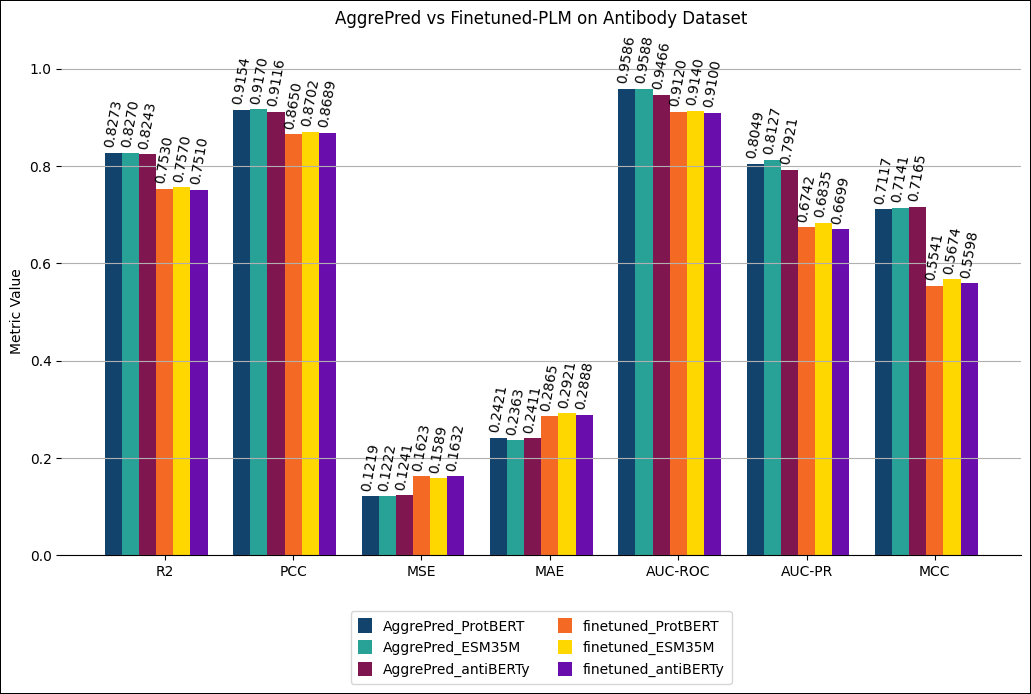

In [58]:

antibody_protbert = [0.8273, 0.9154, 0.1219, 0.2421, 0.9586, 0.8049, 0.7117]
antibody_esm35M = [0.827, 0.917, 0.1222, 0.2363, 0.9588, 0.8127, 0.7141]
antibody_antiberty = [0.8243, 0.9116, 0.1241, 0.2411, 0.9466, 0.7921, 0.7165]

antibody_protbert_finetuned = [0.753, 0.8650, 0.1623, 0.2865, 0.912, 0.6742, 0.5541]
antibody_esm35M_finetuned = [0.757, 0.8702, 0.1589, 0.2921, 0.914, 0.6835, 0.5674]
antibody_antiberty_finetuned = [0.751, 0.8689, 0.1632, 0.2888, 0.910, 0.6699, 0.5598]

datasets = [antibody_protbert, antibody_esm35M, antibody_antiberty, antibody_protbert_finetuned, antibody_esm35M_finetuned,antibody_antiberty_finetuned]

model_names = ['AggrePred_ProtBERT', 'AggrePred_ESM35M','AggrePred_antiBERTy' ,'finetuned_ProtBERT', 'finetuned_ESM35M','finetuned_antiBERTy']

colors = ['#12436D', '#28A197', '#801650', '#F46A25', '#FFD700', '#6A0DAD']
plot_comparison(labels, datasets, model_names, colors, title='AggrePred vs Finetuned-PLM on Antibody Dataset')



## Graph-based vs Seq-based

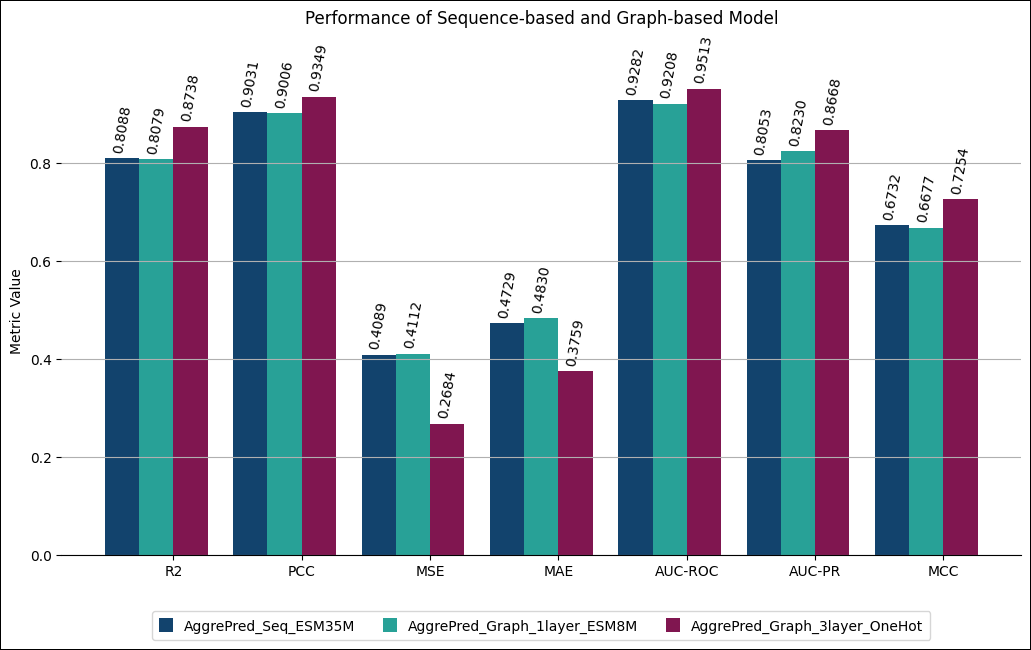

In [60]:
seq_based = [0.8088, 0.9031, 0.4089, 0.4729, 0.9282, 0.8053, 0.6732]

# Graph-based models
graph_onehot_3EGNN = [0.8738, 0.9349, 0.2684, 0.3759, 0.9513, 0.8668, 0.7254]
graph_esm8M_1EGNN = [0.8079, 0.9006, 0.4112, 0.4830, 0.9208, 0.8230, 0.6677]

# graph_onehot_3GAT = [0.7734, 0.8799, 0.4989, 0.5328, 0.9215, 0.7733, 0.6053]
# onehot_3GCN = [0.658, 0.8252, 0.7218, 0.6571, 0.8507, 0.6986, 0.5806]
# graph_onehot_1EGNN = [0.5421, 0.7366, 0.9663, 0.7135, 0.8116, 0.6011, 0.3711]
# graph_esm8M_1GAT = [0.6303, 0.7975, 0.7914, 0.6653, 0.9028, 0.7148, 0.5671]
# graph_esm8M_1GCN = [0.6021, 0.7531, 0.9211, 0.7211, 0.8917, 0.7081, 0.5491]

# Prepare datasets for plotting
datasets = [seq_based,graph_esm8M_1EGNN,graph_onehot_3EGNN ]

model_names = ['AggrePred_Seq_ESM35M','AggrePred_Graph_1layer_ESM8M', 'AggrePred_Graph_3layer_OneHot']

# Choose colors for each model
colors = ['#12436D', '#28A197', '#801650']

# Plot the comparison
plot_comparison(labels, datasets, model_names, colors, title='Performance of Sequence-based and Graph-based Model')